In [ ]:
from helper_functions import *
import numpy as np

# General plan

We will do the displacement of all points without the first order approximation and compare results. What this means is that we will displace a copy of the curve at every point and then find the changes in curvature and metric. As opposed to displacing the curve at each point, finding the metric and curvature differences, and then adding up the results of separate independent displacements (which is correct only to first order).

## First let's create these displacements

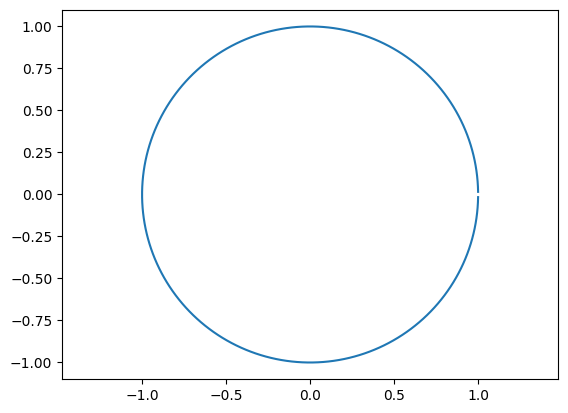

In [3]:
"""
Example curve
"""

import numpy as np
import matplotlib.pyplot as plt

N_points = 200
R = 1
thetaspan = 2 * np.pi

thetas = np.linspace(0, thetaspan * (N_points-1)/(N_points), N_points)
thetas = thetas + thetaspan / N_points / 2


xs = R * np.cos(thetas)
ys = R * np.sin(thetas)

curve = np.array([xs, ys]).T

plt.plot(xs, ys)
plt.axis('equal')
plt.show()

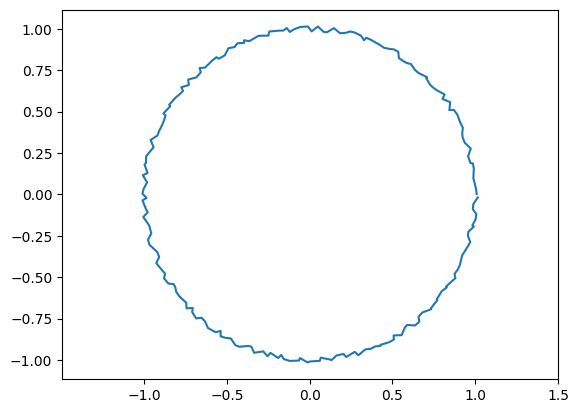

In [4]:
"""
Creating one displaced curve
"""

step = 2 * np.pi * R / N_points
step_theta = 2 * np.pi / N_points

epsilon = step * 0.5

#bug fix: this - 0.5 makes all the difference
vdisps_whole = np.random.rand(len(curve), 2) - 0.5
#CHANGE 1: NORMALIZING THE DISPLACEMENTS: no problem (even more regular it seems)
vdisps_whole = vdisps_whole / np.linalg.norm(vdisps_whole, axis=1)[:, None]
vdisps_whole = vdisps_whole * epsilon

curve_copy = curve.copy()

for i, point in enumerate(curve):
    point = point + vdisps_whole[i]
    curve_copy[i] = point

plt.plot(curve_copy[:, 0], curve_copy[:, 1])
plt.axis('equal')
plt.show()

Quite an important realisation!!!. The way I was doing displacements was not spherically symmetric. For some reason the random numbers I chose were between 0 and 1 for the x displacements and the same for y. They should have been between plus and minus 1/2 eg. This was giving some sinusoidal signal which was confounding the overall signal.

In [ ]:
def gen_disp_curves(curve, L, prec=1e-7):
    curve_arr = np.zeros((2 * len(curve), len(curve), 2))
    vdisp_set = np.zeros((2 * len(curve), len(curve), 2))

    step_theta = L / len(curve)
    epsilon = step_theta * prec

    #for clarity, an entry is an entire displaced curve
    for i in range(2 * len(curve)):
        #bug fix: this - 0.5 makes all the difference
        vdisps_whole = np.random.rand(len(curve), 2) - 0.5
        vdisps_whole = vdisps_whole / np.linalg.norm(vdisps_whole, axis=1)[:, None]
        vdisps_whole = vdisps_whole * epsilon

        curve_copy = curve.copy()
        curve_copy += vdisps_whole
        
        curve_arr[i] = curve_copy
        vdisp_set[i] = vdisps_whole

    return curve_arr, vdisp_set

disp_curves, vdisps = gen_disp_curves(curve, 2*np.pi)

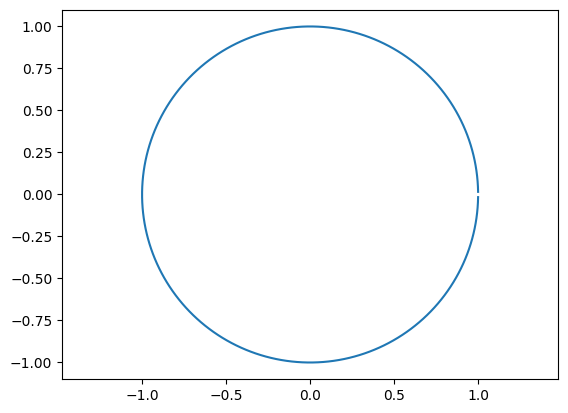

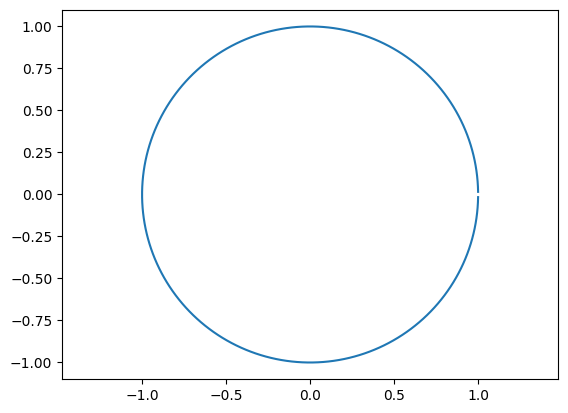

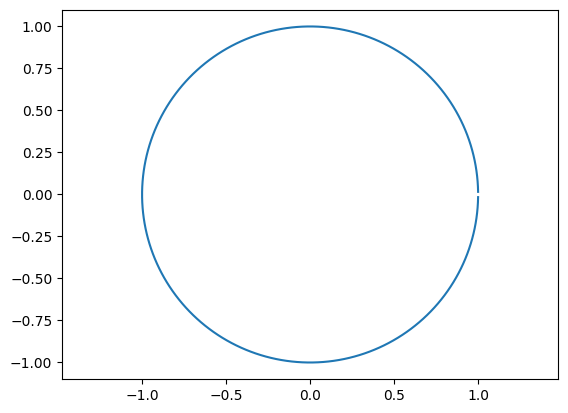

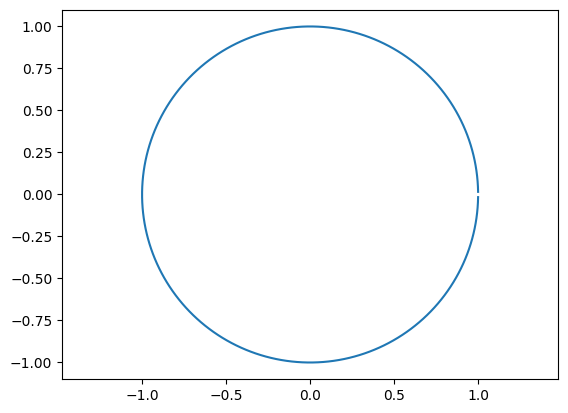

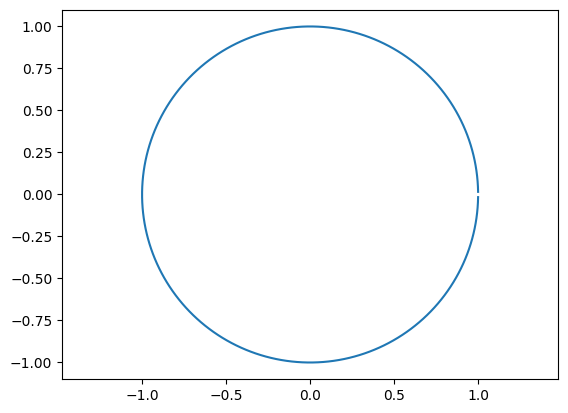

In [ ]:
for i in range(5):
    plt.plot(disp_curves[i, :, 0], disp_curves[i, :, 1])
    plt.axis('equal')
    plt.show()

In [ ]:
a = np.array([1, 2, 3])
b = a
b[0] = 5
print(a)

[5 2 3]


## Next, let's move on to calculating the matrix

In [ ]:
#This is now all tested and it's in the helper function file

In [ ]:
5//2

2

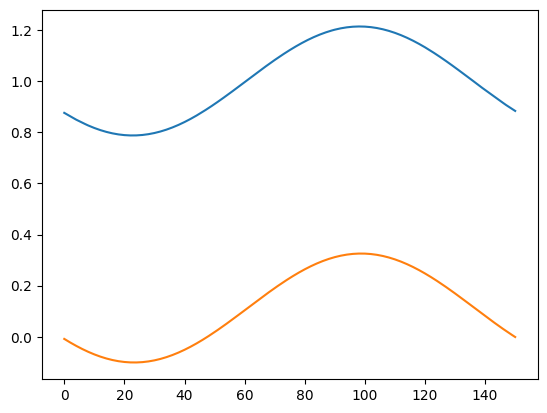

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import *

N_points = 201
R = 1
L = 2 * np.pi * R
thetaspan = 2 * np.pi

thetas = np.linspace(0, thetaspan * (N_points-1)/(N_points), N_points)
thetas = thetas + thetaspan / N_points / 2

# thetas = np.linspace(0, thetaspan * N_points/(N_points + 1), N_points)

xs = R * np.cos(thetas)
ys = R * np.sin(thetas)

curve = np.array([xs, ys]).T

sigmas, ms = backward_solver_set(curve, 2*np.pi*R, 151)

plt.plot(sigmas, label='sigma')
plt.plot(ms, label='m')

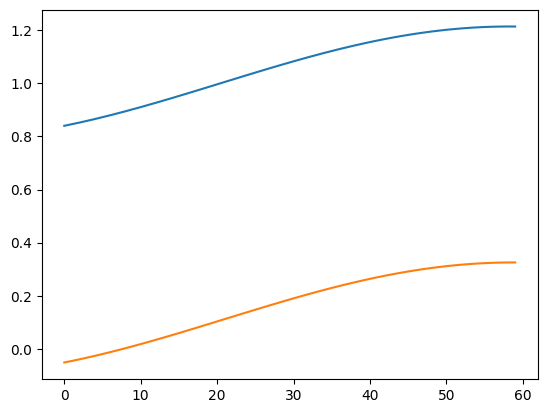

In [ ]:
plt.plot(sigmas[40:100], label='sigma')
plt.plot(ms[40:100], label='m')

### Let's debug the populate matrix set stuff by santi forward


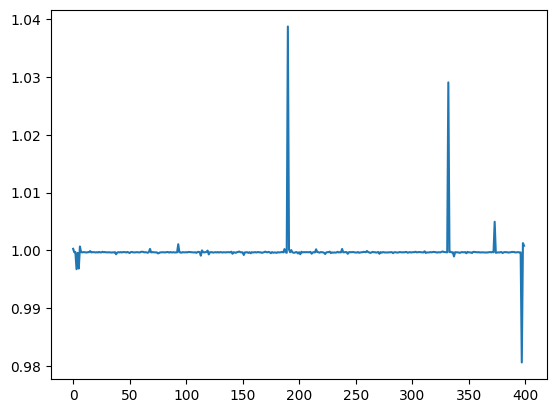

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import *

def dividing_factors(vdisp_set, curve, L):
    out = np.zeros(len(vdisp_set))
    ds = L / len(curve)

    for i, vdisp_whole in enumerate(vdisp_set):
        for j in range(len(curve)):
            out[i] += np.dot(vdisp_whole[j], unit_normals(curve)[j]) * ds
    return out

N_points = 200
R = 2.5
p = 1
L = 2 * np.pi * R

thetaspan = 2 * np.pi
thetas = np.linspace(0, thetaspan * (N_points-1)/(N_points), N_points)
thetas = thetas + thetaspan / N_points / 2

xs = R * np.cos(thetas)
ys = R * np.sin(thetas)
curve = np.array([xs, ys]).T

disp_curves, vdisp_set = gen_disp_curves(curve, L)
A = populate_matrix_set(curve, L, disp_curves)
div_factors = dividing_factors(vdisp_set, curve, L)

tension_vector = np.zeros(2 * len(curve))
tension_vector[0::2] = p * R

rhs_supposed = np.dot(A, tension_vector)
rhs_copy = rhs_supposed.copy()
rhs_supposed /= div_factors

plt.plot(rhs_supposed, label='rhs supposed')

### Let's try and remember what we found out. 

I think we had initially found some crazy results like the very first day of the project, but this was fixed by debugging by santi fwd

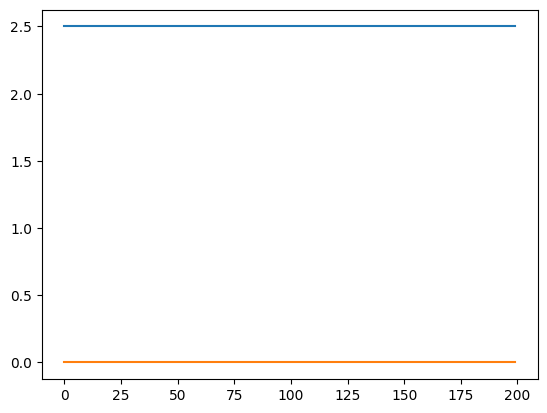

In [ ]:
soln_reworked = np.linalg.solve(A, rhs_copy)

plt.plot(soln_reworked[0::2], label='sigmas')
plt.plot(soln_reworked[1::2], label='ms')

In [ ]:
rhs_yet_again = np.dot(A, soln_reworked)



In [ ]:
np.dot(np.linalg.inv(A), A) 

array([[ 1.00000001e+00,  1.32386185e-06, -1.41008727e-08, ...,
        -1.15116190e-07,  3.32433226e-09, -1.12042607e-06],
       [ 1.23757441e-09,  1.00000000e+00,  7.32765169e-10, ...,
        -4.22326436e-08,  8.30191879e-10,  1.16172577e-08],
       [ 4.97917916e-09, -4.42889034e-07,  9.99999997e-01, ...,
         9.80787901e-07,  2.51975919e-09, -2.31558043e-07],
       ...,
       [ 8.70727165e-10, -9.48481273e-10, -1.21717228e-10, ...,
         9.99999977e-01,  6.77833757e-10, -1.60493849e-08],
       [ 1.60833938e-10,  1.58194780e-11, -3.44800372e-12, ...,
        -5.25014477e-09,  1.00000000e+00, -3.21997546e-09],
       [ 8.39485994e-10,  5.81030163e-10, -1.52382796e-10, ...,
        -2.34232190e-08,  5.93311255e-10,  9.99999979e-01]])

###  This is very interesting stuff!!

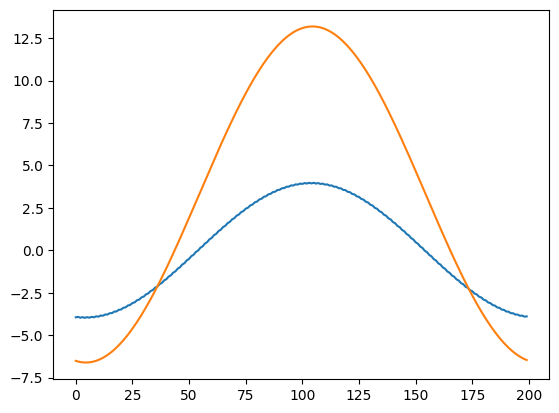

In [ ]:
""""Let's try and understand these epsilons"""


rhs_copy_epcomp = rhs_copy.copy() - div_factors * p

osc_soln = np.linalg.solve(A, rhs_copy_epcomp)
osc_sigmas = osc_soln[0::2]
osc_ms = osc_soln[1::2]

plt.plot(osc_sigmas, label='osc sigmas')
plt.plot(osc_ms, label='osc ms')

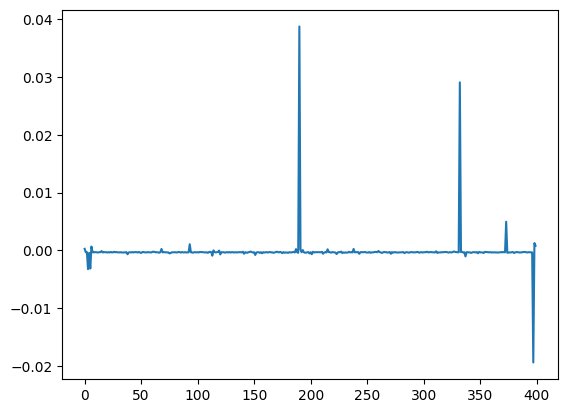

In [ ]:
epsilons = rhs_copy_epcomp / div_factors

plt.plot(epsilons[:], label='epsilons')

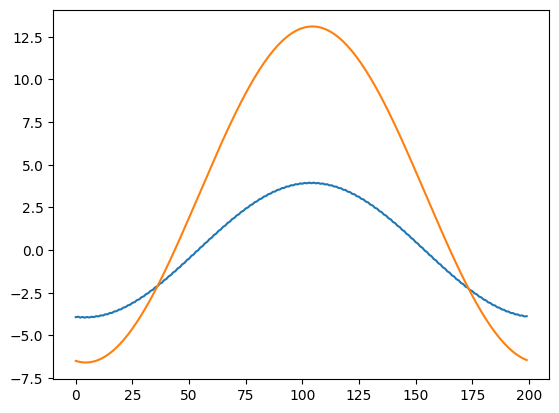

In [ ]:
epsilons_amputated = epsilons.copy()

epsilons_amputated[190] = 0
epsilons_amputated[332] = 0

epcomp_amputated = div_factors * epsilons_amputated

osc_soln = np.linalg.solve(A, epcomp_amputated)
osc_sigmas = osc_soln[0::2]
osc_ms = osc_soln[1::2]

plt.plot(osc_sigmas, label='osc sigmas')
plt.plot(osc_ms, label='osc ms')

### Putting it in the EOM's for Alex

In [ ]:
def dps(seq):
    out = np.zeros(len(seq))
    for i in range(len(seq) - 1):
        out[i] = (seq[i+1] - seq[i - 1]) / 2

    out[-1] = (seq[0] - seq[-2]) / 2
    return out

In [ ]:
import scipy.integrate as spi

dsigmas = dps(sigmas) / (L / len(sigmas))
tns = dps(ms) / (L / len(sigmas))
dtns = dps(tns) / (L / len(sigmas))

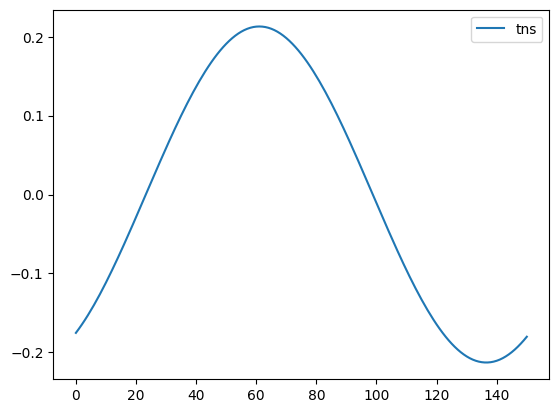

In [ ]:
plt.plot(tns, label='tns')
plt.legend()
plt.show()

In [ ]:
np.array([curvature(curve, i)for i in range(len(sigmas))])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

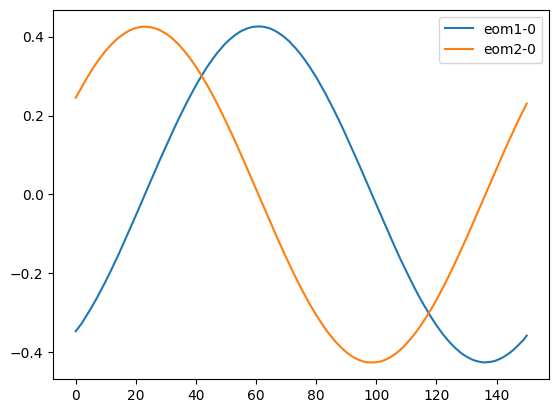

a = 0.15119078059876112, b = 4.173003189557899, phi = -1.8766893051763018


In [ ]:
from scipy.optimize import curve_fit

eom1 = dsigmas + tns 
eom2 = dtns - sigmas + p

plt.plot(eom1, label='eom1-0')
plt.plot(eom2, label='eom2-0')

# # Define the model function
# def model(x, a, b, phi):
#     return a * np.sin(0.01 * b * x +phi)

# # Fit the model to the data
# popt, pcov = curve_fit(model, np.arange(len(eom2)), eom2)

# # Extract the parameters
# a, b, phi = popt

# # Plot the fitted curve
# plt.plot(np.arange(len(eom2)), model(np.arange(len(eom2)), a, b, phi), label='fit')
plt.legend()
plt.show()

print(f'a = {a}, b = {b}, phi = {phi}')